# Data Mining and Analysis Course-Work: Semester 6
## Date of Submission: July 28, 2021
### Submitted To: Dr. Varun Gupta
### Submitted By: Anshul Gupta (CO18311), Kanishk Mamgain (CO18331), Maninder Singh (CO18332)
#### Software Used: IBM Watson Studio

# Use Case: To visualize, classify, predict and compare various models/ prepocessing algorithms to check whether a news is true or fake based on a given dataset.
## Motivation: In this ever increasing social world we see lots of news circulating may it be on social media platforms or on the internet across the globe. So there is a need to classify how can one be sure whether the news is true i.e. is genuine and can be trusted upon from our existing Machine Learning Models and Deep Learning Algorithms. We have also worked on a reasearch of how various social networking sites likeTwitter make their algorithm work to get to know the actual facts about a particular news which helped us carrying this idea forward. 
### Below is a solution for the provided data set and we have tried to make it possible so that it works on any real world dataset as well.

# Dataset:  The data set is provided at https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset as Fake.csv and True.csv having news classified as fake and true, respectively.

# ETL Process:
### 1. Extracting/Accessing the data from the source mentioned above to cloud storage.
### 2. Transforming the data to pandas dataframe so that we can work on it easily.
### 3. As this is the case of operational relational data we denormalize the two tables to one so that processing and our tasks are bound to a single table and not both.


## Importing Fake News Dataset as Fake.csv from the cloud storage and Converting it into pandas dataframe as df_data_1

In [81]:
# The code was removed by Watson Studio for sharing.

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


## Importing True News Dataset as True.csv from the cloud storage and Converting it into pandas dataframe as df_data_2

In [82]:
#IMPORTING true DATASET
body = client_0a540e30cc1440b39b57345b3721ab45.get_object(Bucket='advanceddatasciencecapstone-donotdelete-pr-fojwop46awrbkp',Key='True.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
df_data_2 = pd.read_csv(body)
df_data_2.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Denormalizing the two tables into one as df_data

In [83]:
df_data_1['isFake_or_isTrue'] = 0 #fake news==0
df_data_2['isFake_or_isTrue'] = 1 #true news==1
df_data = pd.concat([df_data_1, df_data_2], ignore_index=True)
df_data

,title,text,subject,date,isFake_or_isTrue
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


# Initial Data Exploration and Data Quality Assessment

## Checking for any NULL, empty or missing values in the formed table.

In [84]:
df_data.isnull().sum()

title               0
text                0
subject             0
date                0
isFake_or_isTrue    0
dtype: int64

This shows that no COLUMN in our dataframe has NULL values.

## Lets analyse the amount of fake and true news we have in our dataframe.¶

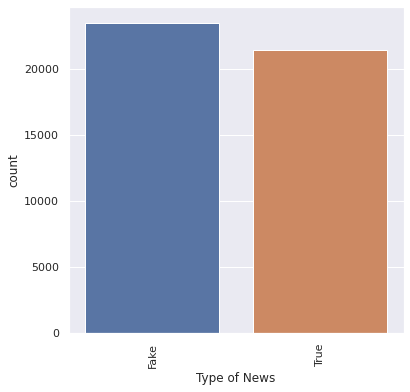

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(6,6))
ax = sns.countplot(x="isFake_or_isTrue", data=df_data)
ax.set_xticklabels(['Fake', 'True'])
plt.xlabel('Type of News')
plt.xticks(rotation=90)
plt.show()

This shows that true and fake news are almost of the same count.

## Analysing the column 'date'

In [86]:
fake_date = df_data_1.groupby('date').date.agg([('count', 'count')]).reset_index().sort_values(by = "count", ascending = False)
fake_date = fake_date.head(50)
true_date = df_data_2.groupby('date').date.agg([('count', 'count')]).reset_index().sort_values(by = "count", ascending = False)
true_date = true_date.head(50)

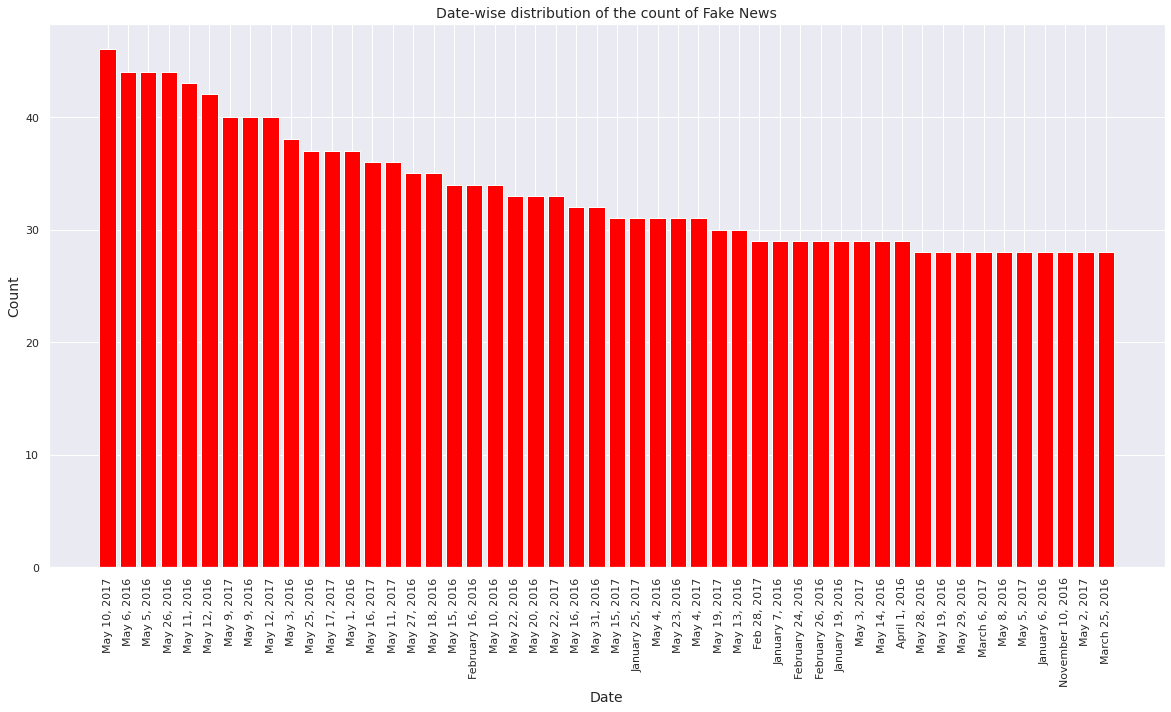

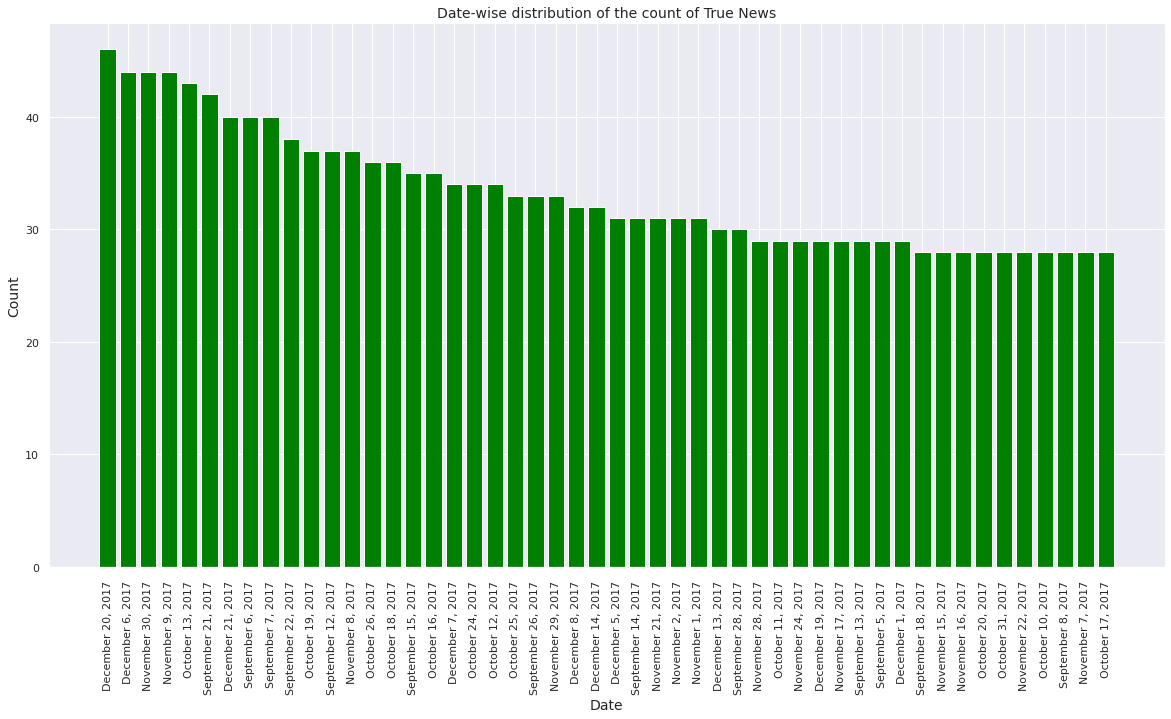

In [87]:
#plotting datevsfakenewscount
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.bar(fake_date["date"], fake_date["count"], align = "center", color = "red")
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Date-wise distribution of the count of Fake News", fontsize = 14)
plt.show()
#plotting datevstruenewscount
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
plt.bar(true_date["date"], fake_date["count"], align = "center", color = "green")
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Date-wise distribution of the count of True News", fontsize = 14)
plt.show()


The above barchart shows that the most of the fake news are released in May with the most on May 10,2017 (40+) while most of the true news are mostly published between September and December with the most on December 20,2017 (40+).

## Lets analyse the column 'subject' in our dataframe and check if we have any similarity amongst them in fake and true news

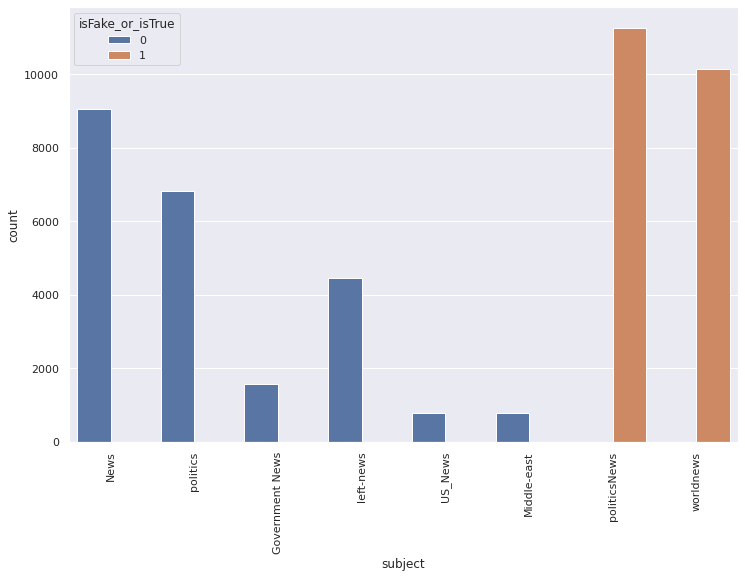

In [88]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="subject", hue="isFake_or_isTrue", data=df_data)
plt.xticks(rotation=90)
plt.show()

This shows that most of the news that are fake are of the subject 'News' and are of the subject 'politicsNews' in case of a true news. Also, that there is no common subject between a true news and a fake news. 

## Analysing the columns 'title'

### Based on Length of title

In [89]:
#getting length of each title cell corresponding to each title
df_data['title_length'] = df_data['title'].apply(lambda x : len(x.strip().split()))

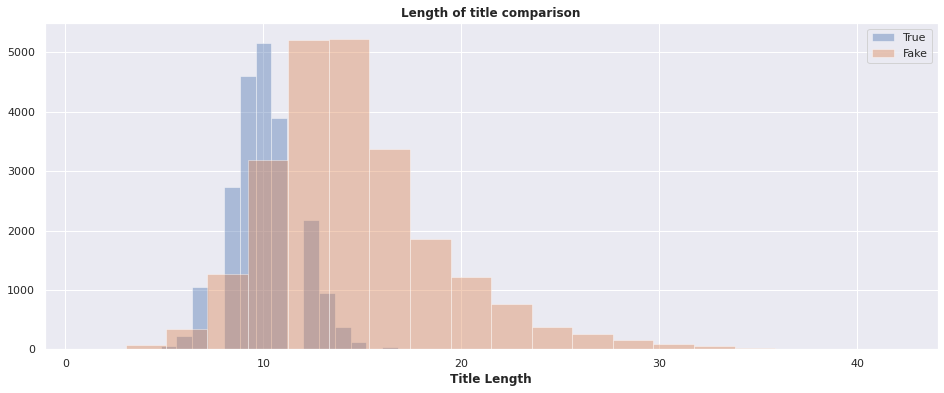

In [90]:
plt.figure(figsize=(16,6))
sns.distplot(df_data[df_data['isFake_or_isTrue'] == 1]['title_length'], 
             kde=False, label='True', bins=20)
sns.distplot(df_data[df_data['isFake_or_isTrue'] == 0]['title_length'], 
             kde=False, label='Fake', bins=20)
plt.xlabel('Title Length', weight='bold')
plt.title('Length of title comparison', weight='bold')
plt.legend()
plt.show()

### Based on the word count of the title

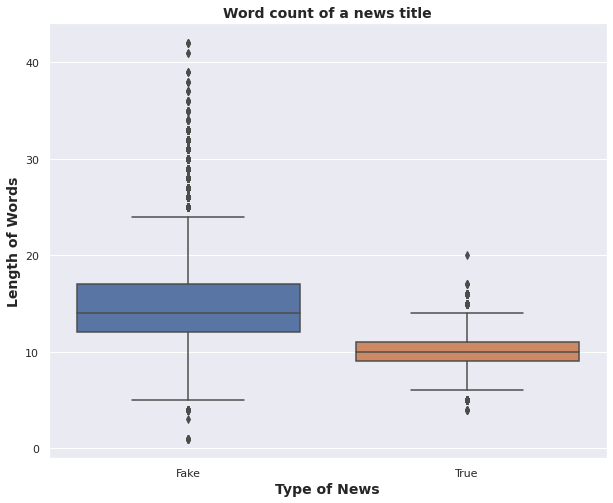

In [91]:
fig = plt.figure(figsize=(10, 8))
plt.title("Word count of a news title", fontsize=14, weight='bold')
ax = sns.boxplot(x="isFake_or_isTrue", y="title_length", data=df_data)
ax.set_xticklabels(['Fake', 'True'])
ax.set_xlabel("Type of News", fontsize=14, weight='bold') 
ax.set_ylabel("Length of Words", fontsize=14, weight='bold')
plt.show()

This shows length of the titles of fake news are usually longer and have a larger word count as compared to the true news.

In [92]:
#Functions to get and visualize the most used words and their count
from collections import defaultdict
#function that returns all the words in a text in the form of a list
def get_words(data):
    word_list = []
    for sentences in data:
        for word in sentences.split():
            word_list.append(word)
    return word_list
#function that returns most used words in a text in the form of a dictionary associated with a value of the count it is used in that text.            
def most_used(word_list, count=25, return_dict=False):
    default_dict = defaultdict(int)
    for word in word_list:
        default_dict[word] += 1
    maximum_used = sorted(default_dict.items(), key=lambda x : x[1], reverse=True)[:count]
    if return_dict:
        return maximum_used, default_dict
    else:    
        return maximum_used
#function that plots the most used words
def plotting_most_used_words(word_list, word_counts, n, text_description, figsize=(30,10)):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=90)
    plt.yticks(rotation=90)
    plt.bar(word_list, word_counts)
    plt.title(f"Top {n} words in {text_description}", weight='bold')
    plt.ylabel("Word Count", weight='bold')
    plt.show()    

### Visualizing the most used words (100) in both the news column 'title

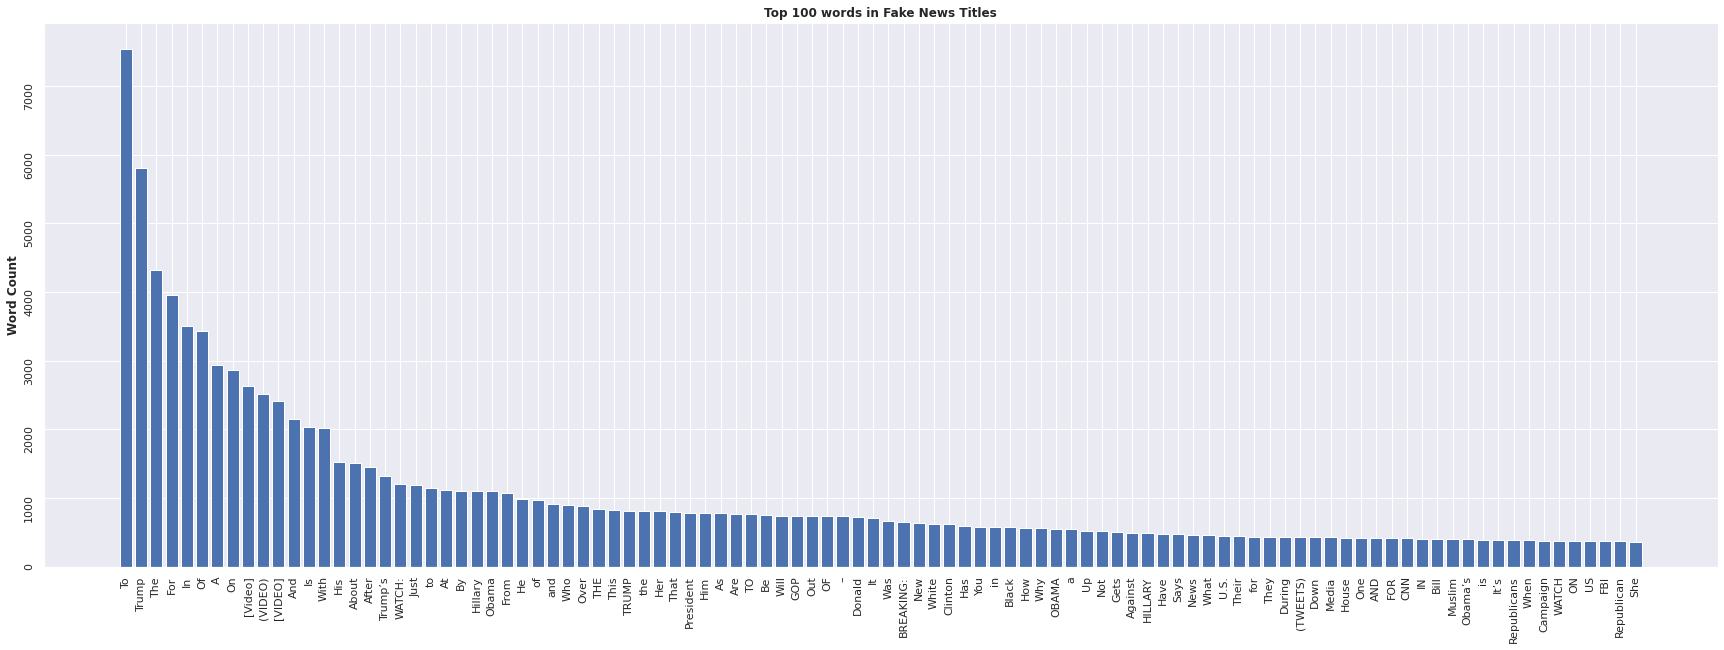

Total unique words in Fake News column 'title': 37418


In [93]:
#most_used_100_words_in_a_fake_news_title
get_word_list= get_words(df_data_1['title'].values)
fake_most_used_words_maximum_times, fake_dict = most_used(get_word_list, count=100, return_dict=True)
fake_words, fake_word_counts = zip(*fake_most_used_words_maximum_times)
plotting_most_used_words(fake_words, fake_word_counts, 100, "Fake News Titles")
print(f"Total unique words in Fake News column 'title': {len(fake_dict)}")

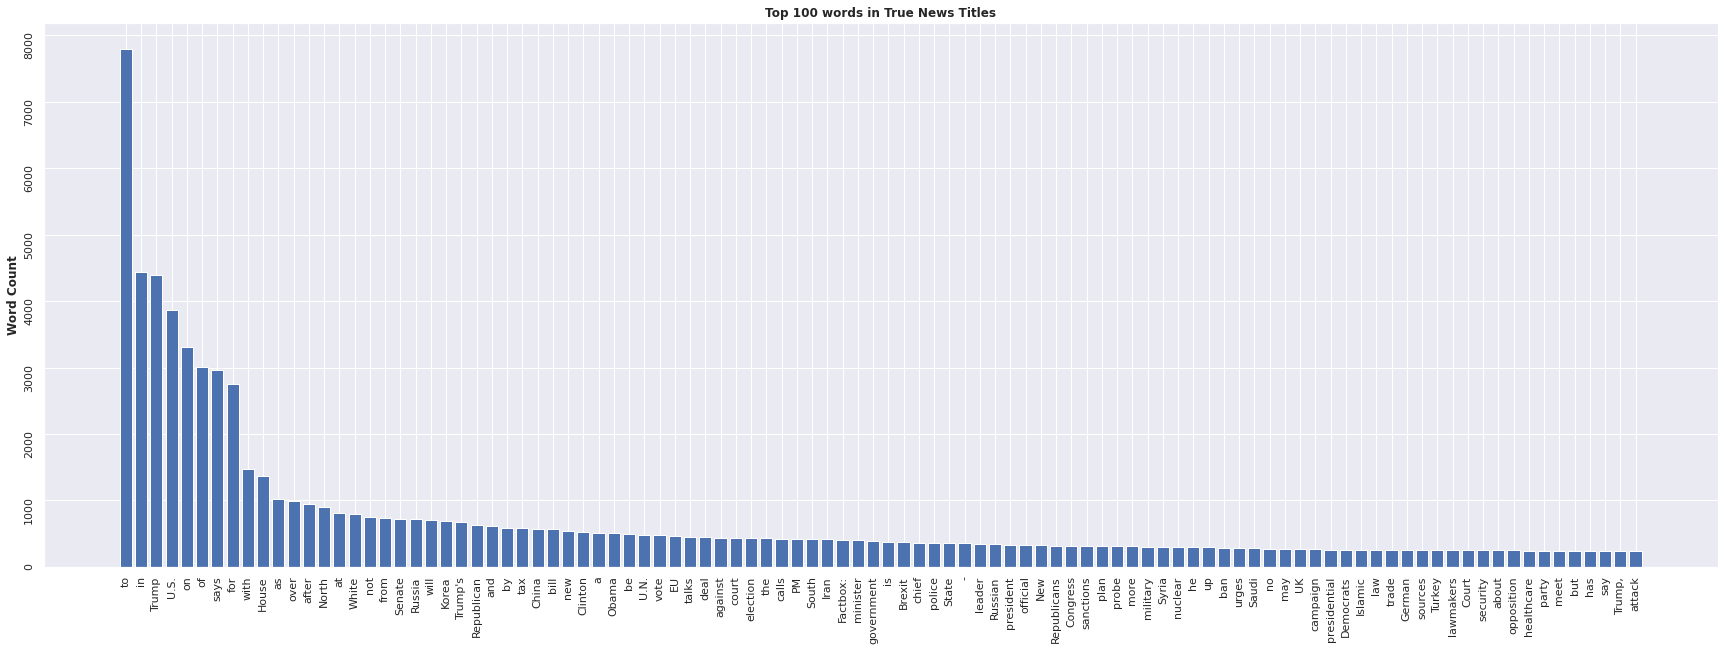

Total unique words in True News column 'Title': 22861


In [94]:
#most_used_100_words_in_a_true_news_title
get_word_list= get_words(df_data_2['title'].values)
true_most_used_words_maximum_times, true_dict = most_used(get_word_list, count=100, return_dict=True)
true_words, true_word_counts = zip(*true_most_used_words_maximum_times)
plotting_most_used_words(true_words, true_word_counts, 100, "True News Titles")
print(f"Total unique words in True News column 'Title': {len(true_dict)}")

From the above visualization it is very clear that there are a lots of duplicacies in the title column and needs cleaning.

## Analysing the columns 'text' 

### Based on Length of text column

In [95]:
#getting length of each text cell corresponding to each text
df_data['text_length'] = df_data['text'].apply(lambda x : len(x.strip().split()))

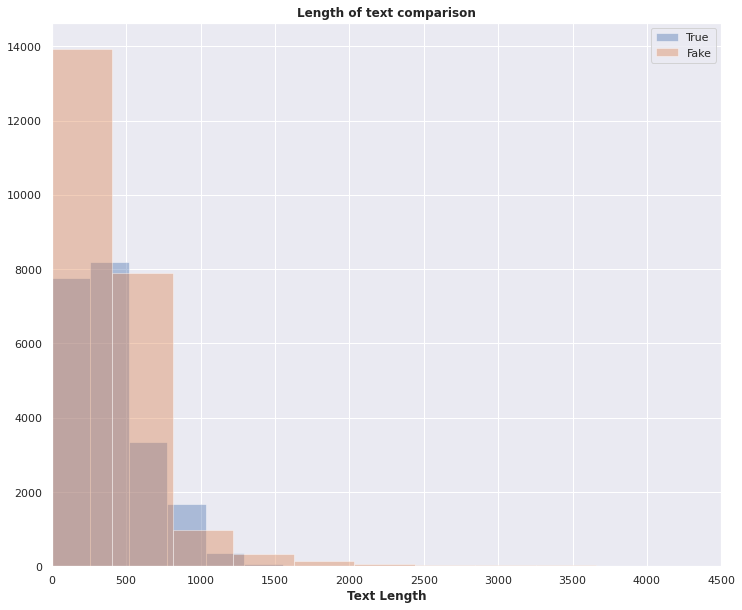

In [96]:
plt.figure(figsize=(12,10))
sns.distplot(df_data[df_data['isFake_or_isTrue'] == 1]['text_length'], 
             kde=False, label='True', bins=20)
sns.distplot(df_data[df_data['isFake_or_isTrue'] == 0]['text_length'], 
             kde=False, label='Fake', bins=20)
plt.xlabel('Text Length', weight='bold')
plt.title('Length of text comparison', weight='bold')
plt.xlim(0.0, 4500)
plt.legend()
plt.show()

### Based on Word count of column text

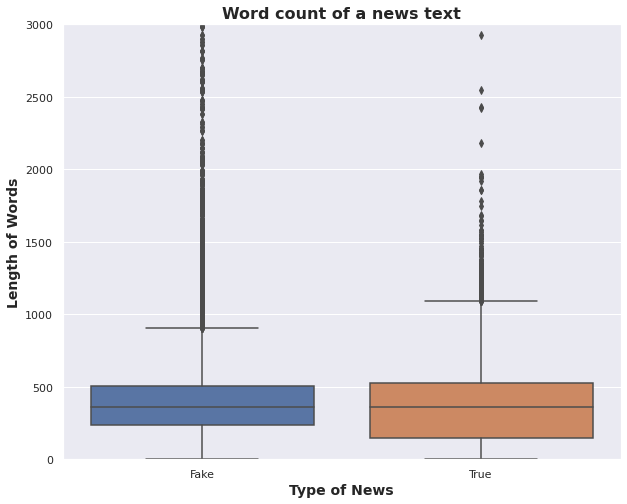

In [97]:
fig = plt.figure(figsize=(10, 8))
plt.title("Word count of a news text", fontsize=16, weight='bold')
ax = sns.boxplot(x="isFake_or_isTrue", y="text_length", data=df_data)
ax.set_xticklabels(['Fake', 'True'])
ax.set_xlabel("Type of News", fontsize=14, weight='bold') 
ax.set_ylabel("Length of Words", fontsize=14, weight='bold')
plt.ylim(0.0, 3000.0)
plt.show()

This shows that the word count of a fake and real news is almost similar while the length of a fake news text is typically longer than of a true news.
This is especially true for the news titles, and in fact the major difference noted above suggests that we could classify articles to a reasonable accuracy using only title length

## Visualizing the most used words (100) in both the news column 'text'

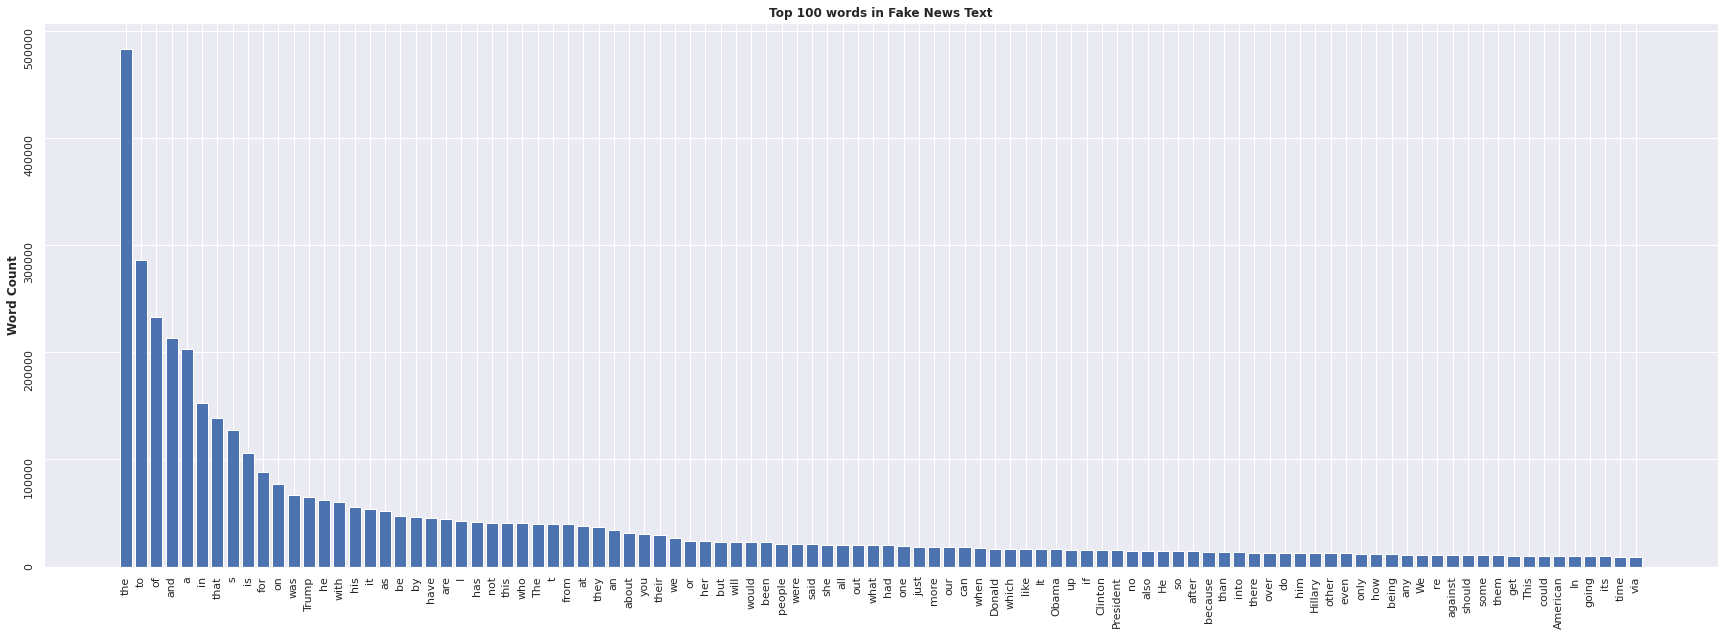

Total unique words in Fake News column 'Text': 293553


In [98]:
#most_used_100_words_in_a_fake_news_column_text
get_word_list_text= get_words(df_data_1['text'].values)
fake_text_most_used_words_maximum_times, fake_text_dict = most_used(get_word_list_text, count=100, return_dict=True)
fake_words_text, fake_word_counts_text = zip(*fake_text_most_used_words_maximum_times)
plotting_most_used_words(fake_words_text, fake_word_counts_text, 100, "Fake News Text")
print(f"Total unique words in Fake News column 'Text': {len(fake_text_dict)}")

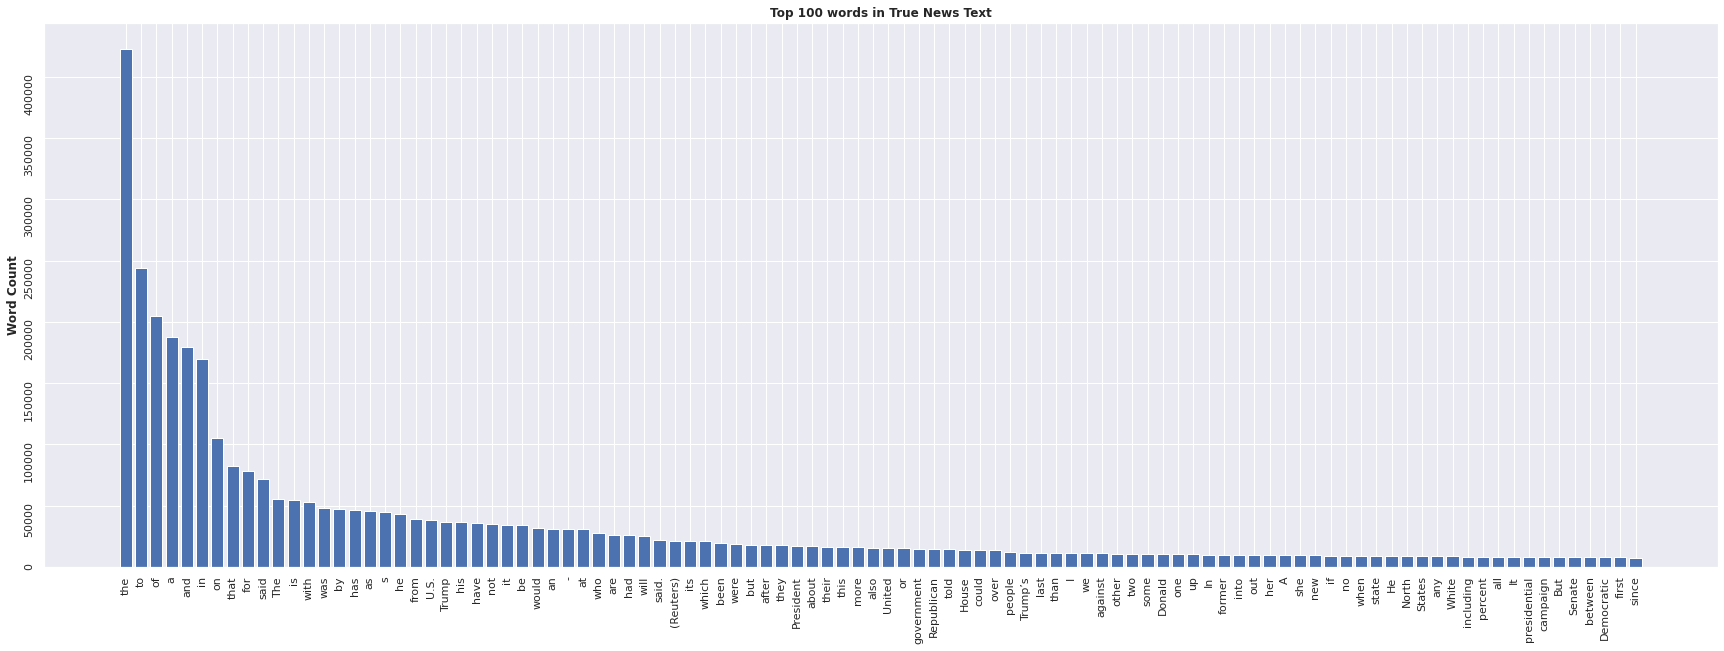

Total unique words in True News column 'Text': 178503


In [99]:
#most_used_100_words_in_a_true_news_column_text
get_word_list_text_true= get_words(df_data_2['text'].values)
true_text_most_used_words_maximum_times, true_text_dict = most_used(get_word_list_text_true, count=100, return_dict=True)
true_words_text, true_word_counts_text = zip(*true_text_most_used_words_maximum_times)
plotting_most_used_words(true_words_text, true_word_counts_text, 100, "True News Text")
print(f"Total unique words in True News column 'Text': {len(true_text_dict)}")

From the above visualization it is very clear that there are a lots of duplicacies in the text column and needs cleaning.

# Important Conclusions from our Data Exploration:
## 1. Field 'date' cannot be taken into consideration for making future predictions as based on a particular date we cannot clearly say whether it is true or a fake news. Also from the visualizations, no relation is seen between both of them.
## 2. Field 'subject' must not be used while making future predictions because though we can train our model for it to fit for this dataset but if we go for some real world unseen data, our model will fail.
## 2. Fields including 'title' and 'text' can be used as the primary columns based on their lengths or word counts or by training the model in a way so that it identifies it is a true news or a fake news but they have lots of duplicacies and require further cleaning and pre-processing.

# FEATURE ENGINEERING- DATA CLEANING, PRE-PROCESSING, FEATURE CREATION AND VISUALIZATIONS

## Data Cleaning

In [100]:
# Textual Data cleaning
def clean(data):
    #remove punctuations
    translation = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    data = data.translate(translation)
    
    #convert everything to lowercase
    data = data.lower()
    
    #remove stopwords
    data = ' '.join([word for word in data.split() if word not in STOPWORDS])
    
    return data

In [101]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
#clean title and add to df
df_data['clean_title'] = df_data['title'].apply(clean)
#clean text and add to df
df_data['clean_text'] = df_data['text'].apply(clean)
#combine the cleaned text and tile to a single cell and add to df
df_data['combine_clean_text_title'] = df_data['clean_text'] + " " + df_data['clean_title']

[nltk_data] Downloading package stopwords to /home/wsuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
df_data

,title,text,subject,date,isFake_or_isTrue,title_length,text_length,clean_title,clean_text,combine_clean_text_title
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,12,495,donald trump sends embarrassing new year’s eve...,donald trump wish americans happy new year lea...,donald trump wish americans happy new year lea...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,8,305,drunk bragging trump staffer started russian c...,house intelligence committee chairman devin nu...,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,15,580,sheriff david clarke becomes internet joke thr...,friday revealed former milwaukee sheriff david...,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,14,444,trump obsessed even obama’s name coded website...,christmas day donald trump announced would bac...,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,11,420,pope francis called donald trump christmas speech,pope francis used annual christmas day message...,pope francis used annual christmas day message...
...,...,...,...,...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1,9,466,fully committed nato backs new u approach afgh...,brussels reuters nato allies tuesday welcomed ...,brussels reuters nato allies tuesday welcomed ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1,7,125,lexisnexis withdrew two products chinese market,london reuters lexisnexis provider legal regul...,london reuters lexisnexis provider legal regul...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1,7,320,minsk cultural hub becomes authorities,minsk reuters shadow disused soviet era factor...,minsk reuters shadow disused soviet era factor...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1,9,205,vatican upbeat possibility pope francis visiti...,moscow reuters vatican secretary state cardina...,moscow reuters vatican secretary state cardina...


In [103]:
#Separating for visualization of most used clean text+title
true_df = df_data[df_data['isFake_or_isTrue'] == 1].copy()
fake_df = df_data[df_data['isFake_or_isTrue'] == 0].copy()

## Visualizing most used words in combined and cleaned text and title

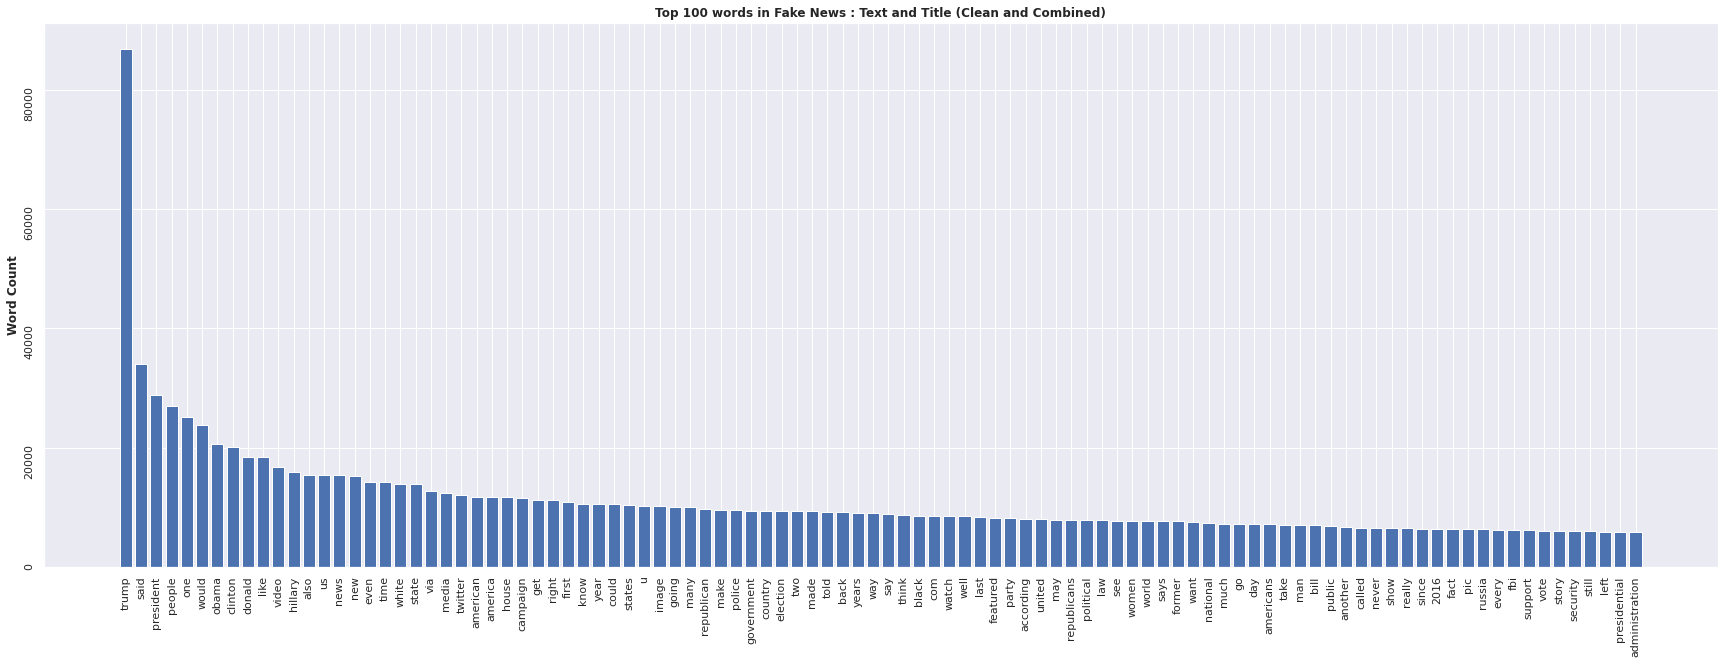

Total unique words in Fake News column 'Combine Clean Text and Title': 103081


In [104]:
get_word_list_text_title= get_words(fake_df['combine_clean_text_title'].values)
fake_combine_text_title_most_used_words_maximum_times, fake_text_title_dict = most_used(get_word_list_text_title, count=100, return_dict=True)
fake_clean_words_text_title, fake_word_counts_text_title = zip(*fake_combine_text_title_most_used_words_maximum_times)
plotting_most_used_words(fake_clean_words_text_title, fake_word_counts_text_title, 100, "Fake News : Text and Title (Clean and Combined)")
print(f"Total unique words in Fake News column 'Combine Clean Text and Title': {len(fake_text_title_dict)}")

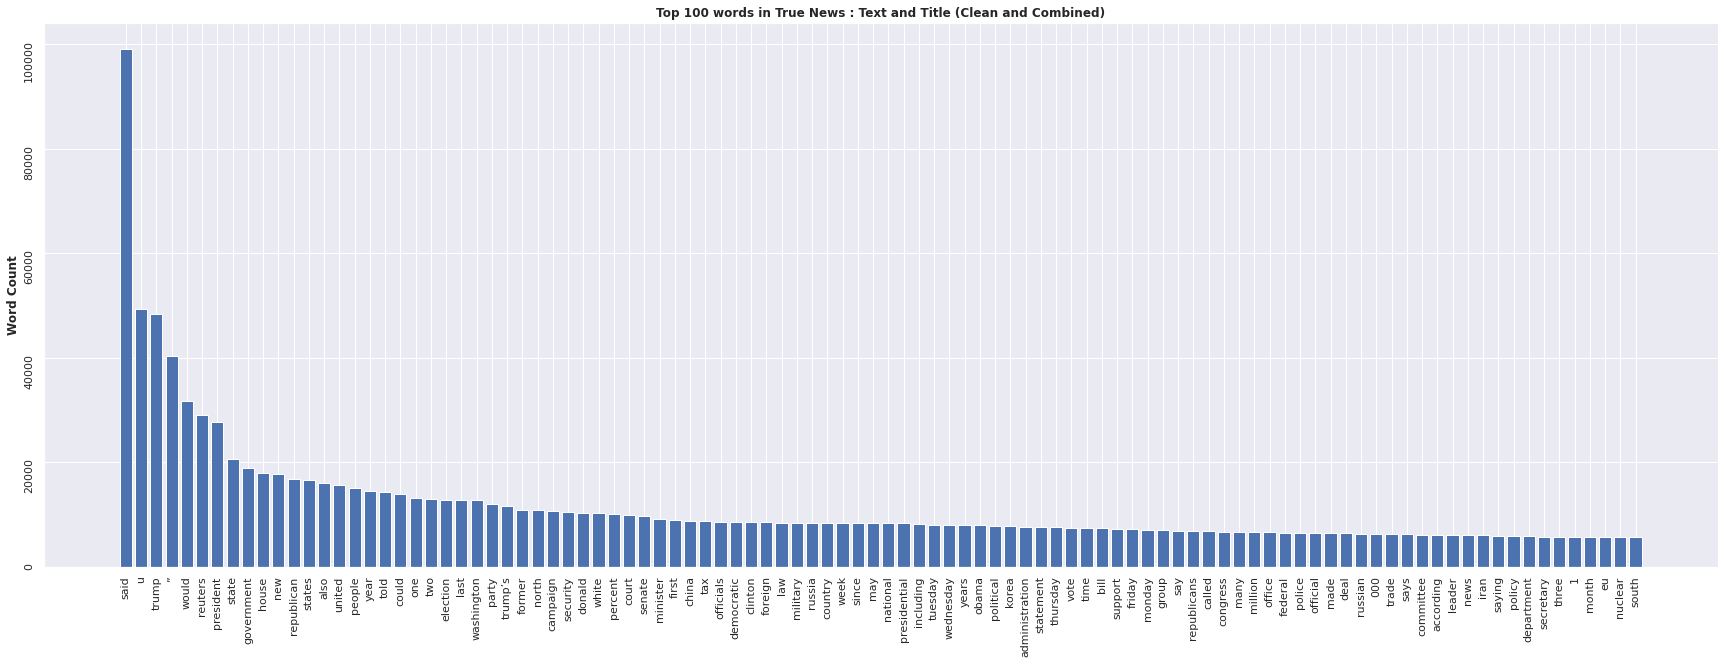

Total unique words in True News column 'Combine Clean Text and Title': 80989


In [105]:
get_true_word_list_text_title= get_words(true_df['combine_clean_text_title'].values)
true_combine_text_title_most_used_words_maximum_times, true_text_title_dict = most_used(get_true_word_list_text_title, count=100, return_dict=True)
true_clean_words_text_title, true_word_counts_text_title = zip(*true_combine_text_title_most_used_words_maximum_times)
plotting_most_used_words(true_clean_words_text_title, true_word_counts_text_title, 100, "True News : Text and Title (Clean and Combined)")
print(f"Total unique words in True News column 'Combine Clean Text and Title': {len(true_text_title_dict)}")

We can try a variety of things to improve on performance in general when cleaning our data. Here I have restricted myself to removing duplicacies of uppercase and lowercases, punctuations, and of-course the stop-words so that there is a minimal loss of the useful data.

## Data Pre-Processing using spaCy

In [106]:
## Data Pre-Processing using spacy
x_combine = df_data['combine_clean_text_title']
x_title = df_data['clean_title']
x_text = df_data['clean_text']
y = df_data['isFake_or_isTrue']
x_combine.shape,x_title.shape,x_text.shape, y.shape

((44898,), (44898,), (44898,), (44898,))

In [107]:
type(x_combine)

pandas.core.series.Series

## Installing and loading spaCy

## Feature Creation

In [108]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
import spacy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

In [109]:
import numpy as np
import en_core_web_sm
nlp = en_core_web_sm.load()
new_features_combine = np.array([nlp(k).vector for k in x_combine])                                                            
# new_features_title = np.array([nlp(l).vector for l in x_title])
# new_features_text = np.array([nlp(m).vector for m in x_text])
new_features_combine.shape

(44898, 96)

We now have a 96 dimensional vector representing each news text data (combined title and text) which is a result of the en_core_web_lg package of spaCy.

## Visualizations based on a 96-D features and our output feature i.e. isFake_or_isTrue

### Applying PCA first to reduce our feature dimensions for the visualizations through TSNE:

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.81, random_state=45)
%time reduce_feature_dimensions = pca.fit_transform(new_features_combine)
reduce_feature_dimensions.shape

CPU times: user 372 ms, sys: 0 ns, total: 372 ms
Wall time: 140 ms


(44898, 19)

### Visualizing the thus formed high dimensional data using t-distributed Stochastic Neighbor Embedding (t-SNE)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 44898 samples in 0.105s...
[t-SNE] Computed neighbors for 44898 samples in 47.636s...
[t-SNE] Computed conditional probabilities for sample 1000 / 44898
[t-SNE] Computed conditional probabilities for sample 2000 / 44898
[t-SNE] Computed conditional probabilities for sample 3000 / 44898
[t-SNE] Computed conditional probabilities for sample 4000 / 44898
[t-SNE] Computed conditional probabilities for sample 5000 / 44898
[t-SNE] Computed conditional probabilities for sample 6000 / 44898
[t-SNE] Computed conditional probabilities for sample 7000 / 44898
[t-SNE] Computed conditional probabilities for sample 8000 / 44898
[t-SNE] Computed conditional probabilities for sample 9000 / 44898
[t-SNE] Computed conditional probabilities for sample 10000 / 44898
[t-SNE] Computed conditional probabilities for sample 11000 / 44898
[t-SNE] Computed conditional probabilities for sample 12000 / 44898
[t-SNE] Computed conditional probabilities for s

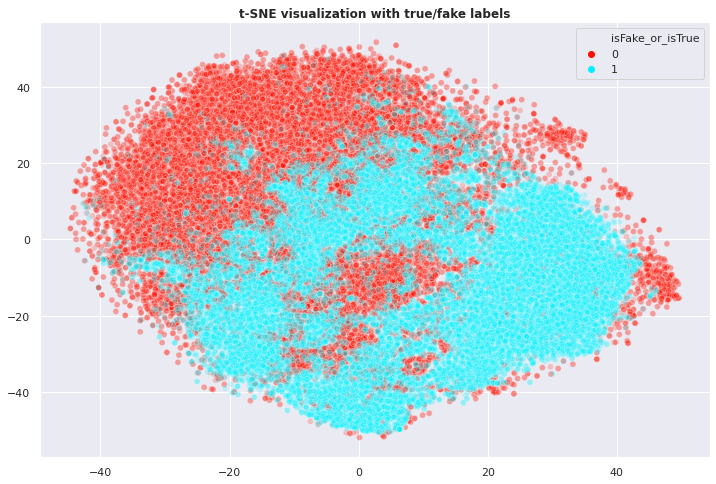

In [111]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=50)
%time feature_x_embedded = tsne.fit_transform(reduce_feature_dimensions)
#visualizing
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
palette = sns.hls_palette(2, l=0.5, s=1)
sns.scatterplot(feature_x_embedded[:,0], feature_x_embedded[:,1], hue=y, legend='full', palette=palette, alpha=0.2)
plt.title('t-SNE visualization with true/fake labels', weight='bold')
plt.show()

t-SNE is a great tool for visualising our vectorised text, however it comes with the burden of significant computational complexity for large datasets with many features. For this reason we applied Principle component analysis (PCA) prior to performing t-SNE, so that the overhead is not so high.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance. 


# Important Conclusions from our Feature Creation Step:
## 1. Concatinated the clean text and title column to one.
## 2. Created a 96-D vector from that combined column using spaCy.
## 3. Successfully Visualized it by reducing feature reduction technique of PCA and then using the t-SNE Visualization tool for high dimensional vectors.
## 4. Will be able to use these features in further model definition and training.

# Model Definition & Training (Machine Learning Models)
## 1. Using Logistic Regression with 96D vector features provided by spaCy
### Splitting data into training and test sets

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import math    
def perform_splits(input_features, output_features, test_size, random_state, stratify):
    x_train, x_test, y_train, y_test = train_test_split(input_features, output_features, shuffle=True, test_size = test_size, random_state=random_state, stratify=stratify)
    return x_train, x_test, y_train, y_test

def final_results(actual, predicted, model_name):
    print('-----------------Model:{0}---------------------------\n'.format(model_name))
    print('Incorrect predictions:{0} out of {1}\n'.format((actual!=predicted).sum(), len(actual)))    
          
    print('--------------------Confusion Matrix:----------------------\n')
    confusionMatrix = confusion_matrix(actual,predicted)
    print(confusionMatrix)
    print('')
    confusionMatrix = pd.DataFrame(confusionMatrix, index=[0,1], columns=[0,1])
    confusionMatrix.index.name = 'Actual'
    confusionMatrix.columns.name = 'Predicted'
    plt.figure(figsize = (10,10))
    plt.figure()
    #False positives
    FP = confusionMatrix.sum(axis=0) - np.diag(confusionMatrix)  
    #False Negatives
    FN = confusionMatrix.sum(axis=1) - np.diag(confusionMatrix)
    #True Positives
    TP = np.diag(confusionMatrix)
    #True Negatives
    TN = confusionMatrix.values.sum() - (FP + FN + TP)

    # Sensitivity, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('Senstivity/Recall/True Positive Rate:{0}'.format(TPR))
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print('Specificity/True Negative Rate:{0}'.format(TNR))
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('Precision/Positive Predicted Value:{0}'.format(PPV))
    # Negative predictive value
    NPV = TN/(TN+FN)
    print('Negative Predicted Value:{0}'.format(NPV))
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print('False Positive Rate:{0}'.format(FPR))
    # False negative rate
    FNR = FN/(TP+FN)
    print('False Negative Rate:{0}'.format(FNR))
    # False discovery rate
    FDR = FP/(TP+FP)
    print('False Discovery Rate:{0}'.format(FDR))
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Overall Accuracy: {0}'.format(ACC))
    
    
    report = classification_report(actual,predicted,target_names = ['0','1'])
    print('-----------------Classification Report-----------------------\n')
    print(report)
    print('Accuracy of the Model: {:0}%\n'.format(accuracy_score(actual,predicted)*100))
    print('F-1 of the Model: {:0}%\n'.format(f1_score(actual,predicted)*100))
    
    print('-----------------Heat Map Based on Confusion Matrix:-----------------------\n')
    sns.heatmap(confusionMatrix,cmap= "Greens",annot = True, fmt='')
    return accuracy_score(actual,predicted),f1_score(actual,predicted)  

In [113]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = perform_splits(new_features_combine, y, 0.2, 0, y)
print("Shapes of our data for Logistic Regression Model: \nx_train_lr: {0}\ny_train_lr: {1}\nx_test_lr: {2}\ny_test_lr: {3} ".format(x_train_lr.shape, y_train_lr.shape, x_test_lr.shape, y_test_lr.shape))

Shapes of our data for Logistic Regression Model: 
x_train_lr: (35918, 96)
y_train_lr: (35918,)
x_test_lr: (8980, 96)
y_test_lr: (8980,) 


### Define Model using Pre-Trained Logistic Regression Model
Can do more modifications here based on the preprocessing we've done. In our case we already are passing the vectorized features, so the preprocessing is not required again.

In [114]:
pipe_lr = Pipeline([('model', LogisticRegression(solver='lbfgs', max_iter=200))])

### Model Training on existing 80% dataset

In [115]:
model_lr = pipe_lr.fit(x_train_lr, y_train_lr)

### Model Predictions

In [116]:
prediction_lr = model_lr.predict(x_test_lr)

### Model Evaluation

-----------------Model:Logistic Regression---------------------------

Incorrect predictions:828 out of 8980

--------------------Confusion Matrix:----------------------

[[4243  453]
 [ 375 3909]]

Senstivity/Recall/True Positive Rate:Actual
0    0.903535
1    0.912465
dtype: float64
Specificity/True Negative Rate:Predicted
0    0.912465
1    0.903535
dtype: float64
Precision/Positive Predicted Value:Predicted
0    0.918796
1    0.896149
dtype: float64
Negative Predicted Value:Predicted
0    0.896149
1    0.918796
dtype: float64
False Positive Rate:Predicted
0    0.087535
1    0.096465
dtype: float64
False Negative Rate:Actual
0    0.096465
1    0.087535
dtype: float64
False Discovery Rate:Predicted
0    0.081204
1    0.103851
dtype: float64
Overall Accuracy: Predicted
0    0.907795
1    0.907795
dtype: float64
-----------------Classification Report-----------------------

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4696
    

<Figure size 720x720 with 0 Axes>

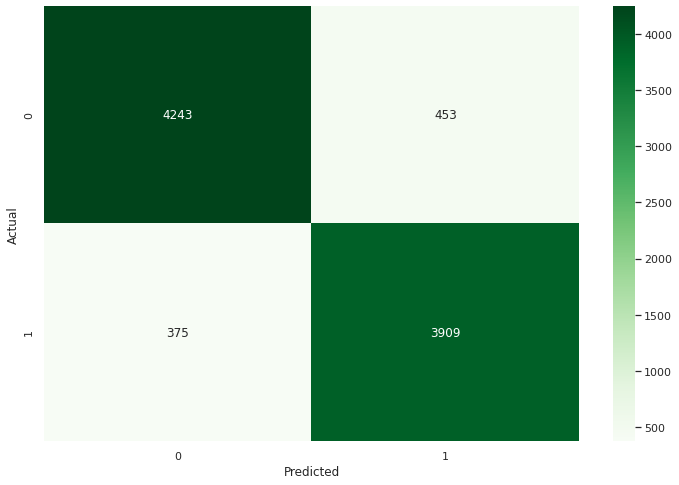

In [117]:
acc_score_lr,f1score_lr=final_results(y_test_lr,prediction_lr,'Logistic Regression')

## 2. Using Decision Tree Classifier with the 96D vector features provided by spaCy

In [118]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = perform_splits(new_features_combine, y, 0.2, 0, y)
print("Shapes of our data for Decision Tree Classifier Model: \nx_train_dt: {0}\ny_train_dt: {1}\nx_test_dt: {2}\ny_test_dt: {3} ".format(x_train_dt.shape, y_train_dt.shape, x_test_dt.shape, y_test_dt.shape))

Shapes of our data for Decision Tree Classifier Model: 
x_train_dt: (35918, 96)
y_train_dt: (35918,)
x_test_dt: (8980, 96)
y_test_dt: (8980,) 


### Define Model using Pre-Trained Decision Tree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier
pipe_dt = Pipeline([
                      ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))
                    ])

### Model Training

In [120]:
model_dt = pipe_dt.fit(x_train_dt, y_train_dt)

### Model Predictions

In [121]:
prediction_dt=model_dt.predict(x_test_dt)

### Model Evaluation

-----------------Model:Decision Tree Classifier---------------------------

Incorrect predictions:1301 out of 8980

--------------------Confusion Matrix:----------------------

[[4135  561]
 [ 740 3544]]

Senstivity/Recall/True Positive Rate:Actual
0    0.880537
1    0.827264
dtype: float64
Specificity/True Negative Rate:Predicted
0    0.827264
1    0.880537
dtype: float64
Precision/Positive Predicted Value:Predicted
0    0.848205
1    0.863337
dtype: float64
Negative Predicted Value:Predicted
0    0.863337
1    0.848205
dtype: float64
False Positive Rate:Predicted
0    0.172736
1    0.119463
dtype: float64
False Negative Rate:Actual
0    0.119463
1    0.172736
dtype: float64
False Discovery Rate:Predicted
0    0.151795
1    0.136663
dtype: float64
Overall Accuracy: Predicted
0    0.855122
1    0.855122
dtype: float64
-----------------Classification Report-----------------------

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      469

<Figure size 720x720 with 0 Axes>

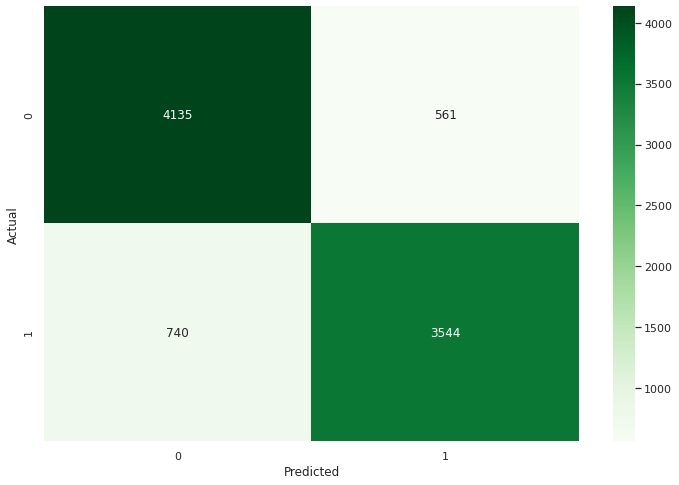

In [122]:
acc_score_dt,f1score_dt=final_results(y_test_dt, prediction_dt,'Decision Tree Classifier')

## Iteration/Approach 2 : Changing the input feature directly to the combined text and using different Vectorizer

### 1. Using Logistic Regression with the textual column 'combined text and title' as input feature by passing through CountVectorizer and TFIDF Approach

Shapes of our data for Logistic Regression Model(Approach 2): 
x_train_lr: (35918,)
y_train_lr_: (35918,)
x_test_lr_: (8980,)
y_test_lr_: (8980,) 
-----------------Model:Logistic Regression using Count Vectorizer and TFIDF---------------------------

Incorrect predictions:96 out of 8980

--------------------Confusion Matrix:----------------------

[[4640   56]
 [  40 4244]]

Senstivity/Recall/True Positive Rate:Actual
0    0.988075
1    0.990663
dtype: float64
Specificity/True Negative Rate:Predicted
0    0.990663
1    0.988075
dtype: float64
Precision/Positive Predicted Value:Predicted
0    0.991453
1    0.986977
dtype: float64
Negative Predicted Value:Predicted
0    0.986977
1    0.991453
dtype: float64
False Positive Rate:Predicted
0    0.009337
1    0.011925
dtype: float64
False Negative Rate:Actual
0    0.011925
1    0.009337
dtype: float64
False Discovery Rate:Predicted
0    0.008547
1    0.013023
dtype: float64
Overall Accuracy: Predicted
0    0.98931
1    0.98931
dtype: float64

<Figure size 720x720 with 0 Axes>

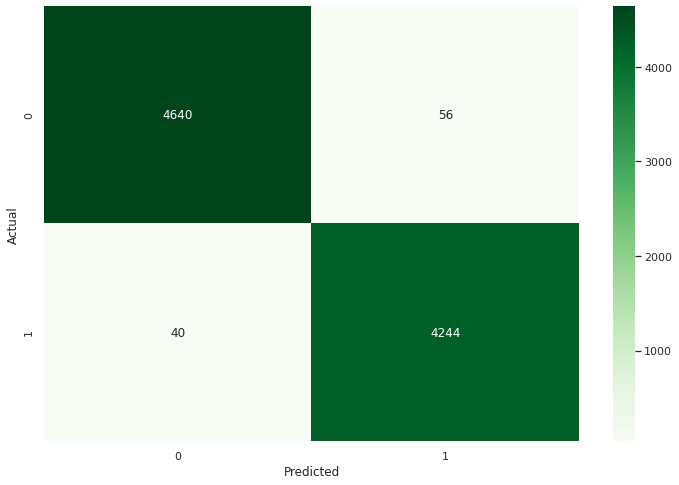

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#Note the input feature
x_train_lr_, x_test_lr_, y_train_lr_, y_test_lr_ = perform_splits(x_combine, y, 0.2, 0, y)
print("Shapes of our data for Logistic Regression Model(Approach 2): \nx_train_lr: {0}\ny_train_lr_: {1}\nx_test_lr_: {2}\ny_test_lr_: {3} ".format(x_train_lr_.shape, y_train_lr_.shape, x_test_lr_.shape, y_test_lr_.shape))

#Define Model using Pre-Trained Logistic Regression Model using CountVectorizer
pipe_lr_ = Pipeline([('vect',CountVectorizer()),
                    ('tfidf',TfidfTransformer()),
                    ('model', LogisticRegression(solver='lbfgs', max_iter=200))])

#Model Training on existing 80% dataset
model_lr_ = pipe_lr_.fit(x_train_lr_, y_train_lr_)

#Model Predictions
prediction_lr_ = model_lr_.predict(x_test_lr_)
#Model Evaluations
acc_score_lr_,f1score_lr_=final_results(y_test_lr_,prediction_lr_,'Logistic Regression using Count Vectorizer and TFIDF')

### 2. Using Decision Tree Classifier with the textual column 'combined text and title' as input feature by passing through CountVectorizer and TFIDF Approach

Shapes of our data for Decision Tree Classifier Model (Approach2): 
x_train_dt_: (35918,)
y_train_dt_: (35918,)
x_test_dt_: (8980,)
y_test_dt_: (8980,) 
-----------------Model:Decision Tree Classifier using Count Vectorizer and TFIDF---------------------------

Incorrect predictions:33 out of 8980

--------------------Confusion Matrix:----------------------

[[4679   17]
 [  16 4268]]

Senstivity/Recall/True Positive Rate:Actual
0    0.996380
1    0.996265
dtype: float64
Specificity/True Negative Rate:Predicted
0    0.996265
1    0.996380
dtype: float64
Precision/Positive Predicted Value:Predicted
0    0.996592
1    0.996033
dtype: float64
Negative Predicted Value:Predicted
0    0.996033
1    0.996592
dtype: float64
False Positive Rate:Predicted
0    0.003735
1    0.003620
dtype: float64
False Negative Rate:Actual
0    0.003620
1    0.003735
dtype: float64
False Discovery Rate:Predicted
0    0.003408
1    0.003967
dtype: float64
Overall Accuracy: Predicted
0    0.996325
1    0.996325
d

<Figure size 720x720 with 0 Axes>

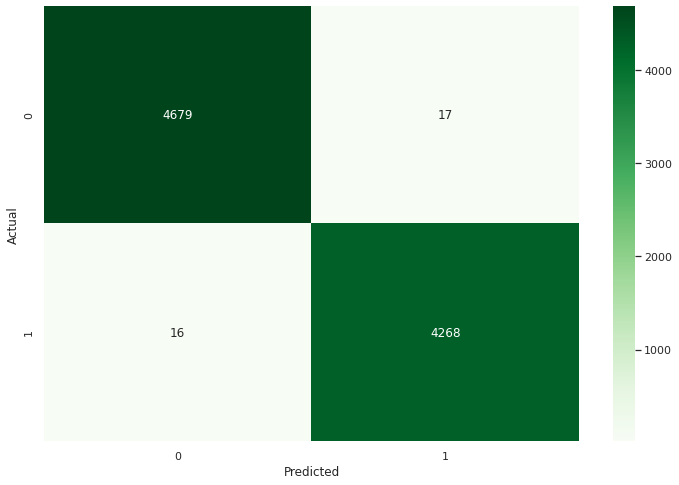

In [124]:
x_train_dt_, x_test_dt_, y_train_dt_, y_test_dt_ = perform_splits(x_combine, y, 0.2, 0, y)
print("Shapes of our data for Decision Tree Classifier Model (Approach2): \nx_train_dt_: {0}\ny_train_dt_: {1}\nx_test_dt_: {2}\ny_test_dt_: {3} ".format(x_train_dt_.shape, y_train_dt_.shape, x_test_dt_.shape, y_test_dt_.shape))

### Define Model using Pre-Trained Decision Tree Classifier with the similar parameters for the classifier
pipe_dt_ = Pipeline([('vect',CountVectorizer()),
                    ('tfidf',TfidfTransformer()),
                    ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))
                    ])
###Model Training
model_dt_ = pipe_dt_.fit(x_train_dt_, y_train_dt_)
###Model Predictions
prediction_dt_=model_dt_.predict(x_test_dt_)
###Model Evaluation
acc_score_dt_,f1score_dt_=final_results(y_test_dt_, prediction_dt_,'Decision Tree Classifier using Count Vectorizer and TFIDF')

# Model Definition & Training (Deep Learning Algorithms)

## 1. Using Artificial Neural Network from a Sequential Model

### Feature Extraction once again using Bag of Words Approach 

In [125]:
features=1000
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
#vectorize the textual data
vectorizer = CountVectorizer(max_features = features)
x = vectorizer.fit_transform(df_data['combine_clean_text_title'])

### Splitting the dataset into the Training, Validation and Test sets (input feature = vector)

In [126]:
# performing 70-15-15 split
from sklearn.preprocessing import LabelEncoder
x_train_ann, x_test_ann, y_train_ann, y_test_ann = train_test_split(x, y, test_size = 0.30, random_state = 0)
print("Shapes of our data for ANN Model: \nx_train_ann: {0}\ny_train_ann: {1}\nx_test_ann: {2}\ny_test_ann: {3} ".format(x_train_ann.shape, y_train_ann.shape, x_test_ann.shape, y_test_ann.shape))

Shapes of our data for ANN Model: 
x_train_ann: (31428, 1000)
y_train_ann: (31428,)
x_test_ann: (13470, 1000)
y_test_ann: (13470,) 


### Model Definition Using Sequential Model and a Dense Layer

In [127]:
!python -m pip install –upgrade pip
!pip install keras==2.1.5
# pip install tensorflow=2.2
# !pip install keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def define_ann():
    model = Sequential()
    model.add(Dense(100,activation = 'relu', input_dim = features))#input_layer with 100 cells
    model.add(Dense(50,activation = 'relu'))#hidden_layers with 50 cells
    model.add(Dense(1,activation = 'sigmoid'))
    return model
model_ann=define_ann()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
ERROR: Invalid requirement: '–upgrade'
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


### Compile Model and View the added Layers

In [128]:
model_ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 105,201
Trainable params: 105,201
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [129]:
train_ann = model_ann.fit(x_train_ann.toarray(), y_train_ann, batch_size = 512, epochs = 7,validation_split=0.2)

Train on 25142 samples, validate on 6286 samples
Epoch 1/7
25142/25142 [==============================] - 31s 1ms/sample - loss: 0.2241 - accuracy: 0.9273 - val_loss: 0.0800 - val_accuracy: 0.9809
Epoch 2/7
25142/25142 [==============================] - 29s 1ms/sample - loss: 0.0553 - accuracy: 0.9866 - val_loss: 0.0535 - val_accuracy: 0.9885
Epoch 3/7
25142/25142 [==============================] - 30s 1ms/sample - loss: 0.0280 - accuracy: 0.9940 - val_loss: 0.0447 - val_accuracy: 0.9893
Epoch 4/7
25142/25142 [==============================] - 30s 1ms/sample - loss: 0.0165 - accuracy: 0.9966 - val_loss: 0.0366 - val_accuracy: 0.9901
Epoch 5/7
25142/25142 [==============================] - 30s 1ms/sample - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.0412 - val_accuracy: 0.9919
Epoch 6/7
25142/25142 [==============================] - 30s 1ms/sample - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.0353 - val_accuracy: 0.9911
Epoch 7/7
25142/25142 [==============================] - 29s 1m

### Accuracy and Loss Visualization

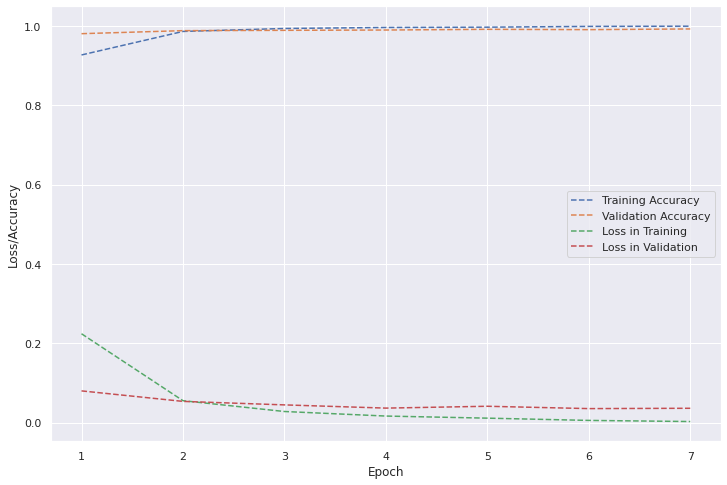

In [130]:
acc_in_training = train_ann.history['accuracy']
acc_in_validation = train_ann.history['val_accuracy']
loss_in_training = train_ann.history['loss']
loss_in_validation = train_ann.history['val_loss']

epochs = range(1, len(loss_in_training) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, acc_in_training,linestyle='--')
plt.plot(epochs, acc_in_validation,linestyle='--')
plt.plot(epochs, loss_in_training,linestyle='--')
plt.plot(epochs, loss_in_validation,linestyle='--')
plt.legend(['Training Accuracy', 'Validation Accuracy','Loss in Training','Loss in Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.show();

Both the training and validation accuracy and loss converging at one point shows there is minimal underfitting or overfitting on the data.

## Model Predictions on the unseen data (test set)

In [131]:
predictions_ann = model_ann.predict(x_test_ann.toarray())
print(predictions_ann)

[[1.000000e+00]
 [1.000000e+00]
 [1.000000e+00]
 ...
 [0.000000e+00]
 [4.058769e-03]
 [7.872282e-04]]


In [132]:
for i in range(len(predictions_ann)):
    if(predictions_ann[i] > 0.5):
        predictions_ann[i] = 1
    else:
        predictions_ann[i] = 0
predictions_ann

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

## Model Evaluation

In [133]:
#checking accuracy for 1 on 1 test set
accr = model_ann.evaluate(x_test_ann.toarray(),y_test_ann)
print(accr)

13470/13470 [==============================] - 71s 5ms/sample - loss: 0.0378 - accuracy: 0.9920s - loss: 0.0379 - ac
[0.03784504110042321, 0.99198216]


### Reshaping actual outputs

In [134]:
le = LabelEncoder()
y_test_ann = le.fit_transform(y_test_ann)
y_test_ann = y_test_ann.reshape(-1,1)
print(y_test_ann)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


-----------------Model:Simple Artificial Neural Network---------------------------

Incorrect predictions:108 out of 13470

--------------------Confusion Matrix:----------------------

[[6976   49]
 [  59 6386]]

Senstivity/Recall/True Positive Rate:Actual
0    0.993025
1    0.990846
dtype: float64
Specificity/True Negative Rate:Predicted
0    0.990846
1    0.993025
dtype: float64
Precision/Positive Predicted Value:Predicted
0    0.991613
1    0.992385
dtype: float64
Negative Predicted Value:Predicted
0    0.992385
1    0.991613
dtype: float64
False Positive Rate:Predicted
0    0.009154
1    0.006975
dtype: float64
False Negative Rate:Actual
0    0.006975
1    0.009154
dtype: float64
False Discovery Rate:Predicted
0    0.008387
1    0.007615
dtype: float64
Overall Accuracy: Predicted
0    0.991982
1    0.991982
dtype: float64
-----------------Classification Report-----------------------

              precision    recall  f1-score   support

           0       0.99      0.99      0.99 

<Figure size 720x720 with 0 Axes>

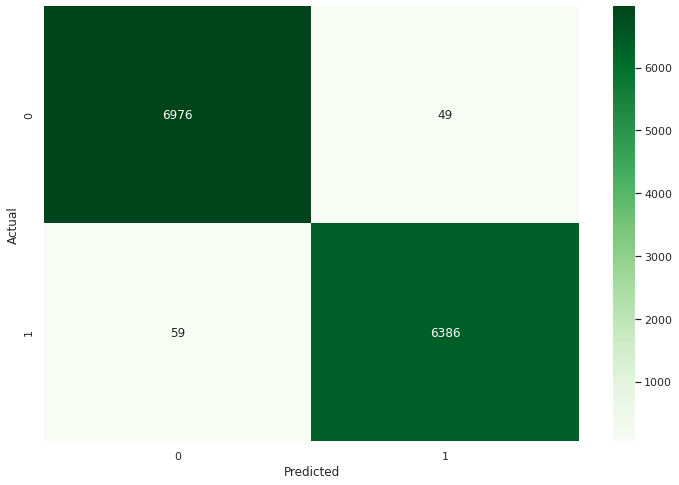

In [135]:
acc_score_ann,f1score_ann=final_results(y_test_ann, predictions_ann,'Simple Artificial Neural Network')

## Iteration 2 using more features with accuracy and F1-score as the primary metrics of evaluation.

### Feature Creation

In [136]:
features_1=10000
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
#vectorize the textual data
vectorizer_1 = CountVectorizer(max_features = features_1)
x_1 = vectorizer_1.fit_transform(df_data['combine_clean_text_title'])

### Splitting the dataset into the Training, Validation and Test sets (input feature = vector)

In [137]:
# performing 70-15-15 split
from sklearn.preprocessing import LabelEncoder
x_train_ann_1, x_test_ann_1, y_train_ann_1, y_test_ann_1 = train_test_split(x_1, y, test_size = 0.30, random_state = 0)
print("Shapes of our data for ANN Model: \nx_train_ann_1: {0}\ny_train_ann_1: {1}\nx_test_ann_1: {2}\ny_test_ann_1: {3} ".format(x_train_ann_1.shape, y_train_ann_1.shape, x_test_ann_1.shape, y_test_ann_1.shape))

Shapes of our data for ANN Model: 
x_train_ann_1: (31428, 10000)
y_train_ann_1: (31428,)
x_test_ann_1: (13470, 10000)
y_test_ann_1: (13470,) 


### Model Definition

In [138]:
def define_ann_():
    model = Sequential()
    model.add(Dense(100,activation = 'relu', input_dim = features_1))#input_layer with 1000 cells
    model.add(Dense(50,activation = 'relu'))#hidden_layers with 50 cells
    model.add(Dense(1,activation = 'sigmoid'))
    return model
model_ann_1=define_ann_()

### Compile Model and View the added Layers

In [139]:
model_ann_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_ann_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               1000100   
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 1,005,201
Trainable params: 1,005,201
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [140]:
train_ann_1 = model_ann_1.fit(x_train_ann_1.toarray(), y_train_ann_1, batch_size = 512, epochs = 7,validation_split=0.2)

Train on 25142 samples, validate on 6286 samples
Epoch 1/7
25142/25142 [==============================] - 34s 1ms/sample - loss: 0.1638 - accuracy: 0.9543 - val_loss: 0.0397 - val_accuracy: 0.9905
Epoch 2/7
25142/25142 [==============================] - 33s 1ms/sample - loss: 0.0206 - accuracy: 0.9971 - val_loss: 0.0286 - val_accuracy: 0.9930
Epoch 3/7
25142/25142 [==============================] - 32s 1ms/sample - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.0354 - val_accuracy: 0.9919
Epoch 4/7
25142/25142 [==============================] - 33s 1ms/sample - loss: 0.0024 - accuracy: 0.9999 - val_loss: 0.0307 - val_accuracy: 0.9932
Epoch 5/7
25142/25142 [==============================] - 32s 1ms/sample - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9932
Epoch 6/7
25142/25142 [==============================] - 32s 1ms/sample - loss: 7.9173e-04 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy: 0.9930
Epoch 7/7
25142/25142 [==============================] - 32

### Accuracy and Loss Visualization

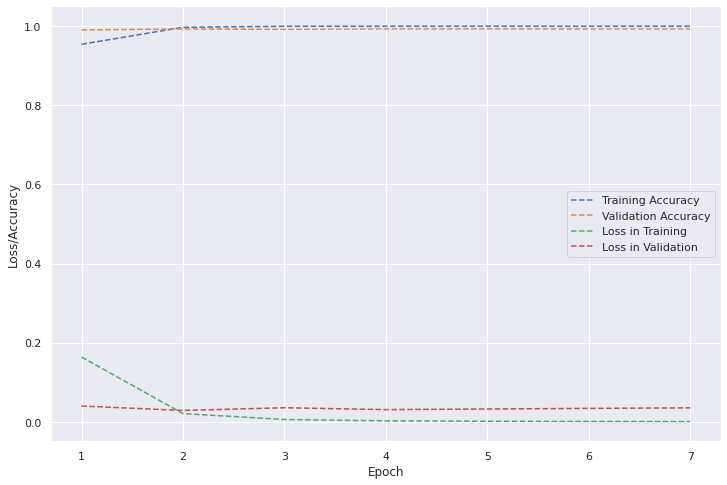

In [141]:
acc_in_training_1 = train_ann_1.history['accuracy']
acc_in_validation_1 = train_ann_1.history['val_accuracy']
loss_in_training_1 = train_ann_1.history['loss']
loss_in_validation_1 = train_ann_1.history['val_loss']

epochs = range(1, len(loss_in_training_1) + 1)

plt.plot(epochs, acc_in_training_1,linestyle='--')
plt.plot(epochs, acc_in_validation_1,linestyle='--')
plt.plot(epochs, loss_in_training_1,linestyle='--')
plt.plot(epochs, loss_in_validation_1,linestyle='--')
plt.legend(['Training Accuracy', 'Validation Accuracy','Loss in Training','Loss in Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.show();

### Model Predictions on the unseen data

In [142]:
predictions_ann_1 = model_ann_1.predict(x_test_ann_1.toarray())
print(predictions_ann_1)

[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 ...
 [0.0000000e+00]
 [3.3361965e-03]
 [9.3332488e-08]]


#### Convert predictions to 1-0 format to compare with actual output

In [143]:
for i in range(len(predictions_ann_1)):
    if(predictions_ann_1[i] > 0.5):
        predictions_ann_1[i] = 1
    else:
        predictions_ann_1[i] = 0
predictions_ann_1

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Model Evaluation

In [144]:
#checking accuracy for 1 on 1 test set
accr_1 = model_ann_1.evaluate(x_test_ann_1.toarray(),y_test_ann_1)
print(accr_1)

13470/13470 [==============================] - 76s 6ms/sample - loss: 0.0438 - accuracy: 0.9924
[0.04384657287703865, 0.9924276]


#### Reshaping actual outputs

In [145]:
le = LabelEncoder()
y_test_ann_1 = le.fit_transform(y_test_ann_1)
y_test_ann_1 = y_test_ann_1.reshape(-1,1)
print(y_test_ann_1)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


-----------------Model:Simple Artificial Neural Network using more feature creation---------------------------

Incorrect predictions:102 out of 13470

--------------------Confusion Matrix:----------------------

[[6965   60]
 [  42 6403]]

Senstivity/Recall/True Positive Rate:Actual
0    0.991459
1    0.993483
dtype: float64
Specificity/True Negative Rate:Predicted
0    0.993483
1    0.991459
dtype: float64
Precision/Positive Predicted Value:Predicted
0    0.994006
1    0.990716
dtype: float64
Negative Predicted Value:Predicted
0    0.990716
1    0.994006
dtype: float64
False Positive Rate:Predicted
0    0.006517
1    0.008541
dtype: float64
False Negative Rate:Actual
0    0.008541
1    0.006517
dtype: float64
False Discovery Rate:Predicted
0    0.005994
1    0.009284
dtype: float64
Overall Accuracy: Predicted
0    0.992428
1    0.992428
dtype: float64
-----------------Classification Report-----------------------

              precision    recall  f1-score   support

           0    

<Figure size 720x720 with 0 Axes>

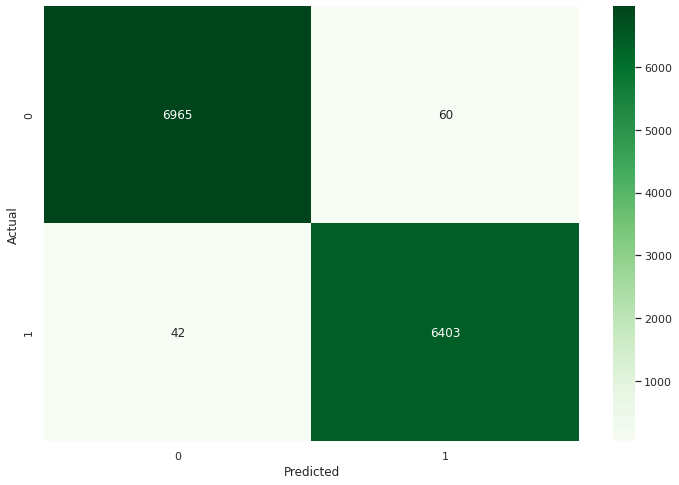

In [146]:
acc_score_ann_1,f1score_ann_1=final_results(y_test_ann_1, predictions_ann_1,'Simple Artificial Neural Network using more feature creation')

# FINAL RESULTS

In [147]:
def comparison(model_names, model_scores, f1scores, figsize=(18, 6), score_type="Accuracy",title="Accuracy of Models using Combine Text And Title Fields"):
    fig= plt.figure(figsize=(18,6))
    axes= fig.add_axes([0.1,0.1,1.2,1.2])
    axes.plot(model_names,model_scores)
    plt.xlabel('Model Name')
    plt.ylabel('Accuracy of Model')
    plt.show()
    
    sns.set(style="darkgrid")
    sns.barplot(model_names, model_scores, alpha=0.9)
    plt.title('Test set accuracy', weight='bold')
    plt.ylabel('Accuracy', fontsize=12, weight='bold')
    plt.xticks()
    plt.ylim(0.0, 1.0)
    plt.show()
    print('----------------FINAL ACCURACIES-------------------')
    final_acc={}
    for names in model_names: 
        for scores in model_scores: 
            final_acc[names] = scores
            model_scores.remove(scores)
            break    
    print(final_acc)
    # barplot of model f1 scores
    sns.set(style="darkgrid")
    sns.barplot(model_names, f1scores, alpha=0.9)
    plt.title('Test set F1 Score', weight='bold')
    plt.ylabel('F1 Score (Macro)', fontsize=12, weight='bold')
    plt.xticks()
    plt.ylim(0.0, 1.0)
    plt.show()
    print('---------------FINAL F1 SCORES-----------------')
    final_scores={}
    for names in model_names: 
        for scores in f1scores: 
            final_scores[names] = scores
            f1scores.remove(scores)
            break
    print(final_scores) 
    return  

# Overall Performance Comparisons of all the models based on accuracy and F1 score:

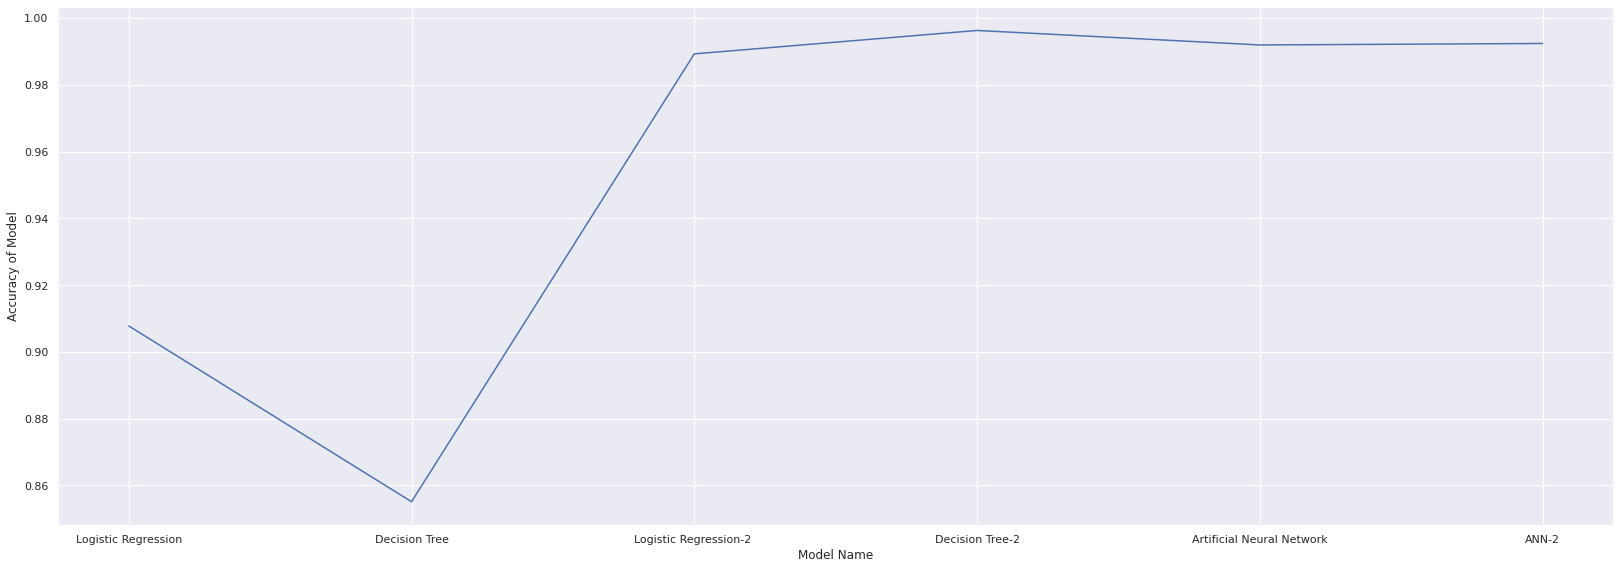

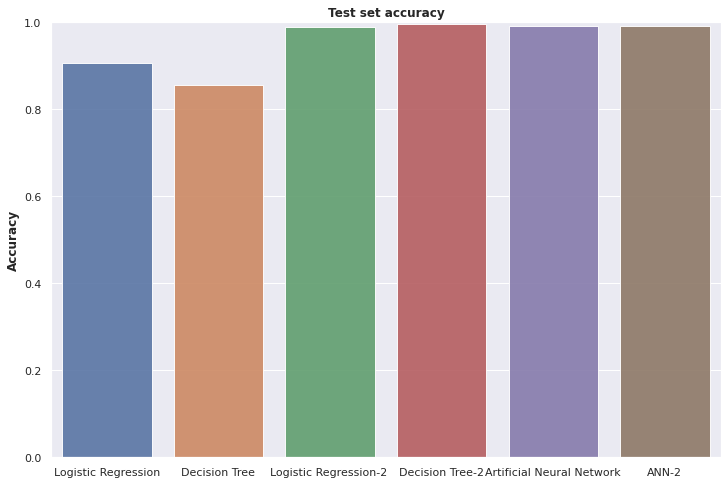

----------------FINAL ACCURACIES-------------------
{'Logistic Regression': 0.9077951002227171, 'Decision Tree': 0.8551224944320712, 'Logistic Regression-2 ': 0.9893095768374165, 'Decision Tree-2': 0.9963251670378619, 'Artificial Neural Network': 0.9919821826280624, 'ANN-2': 0.9924276169265034}


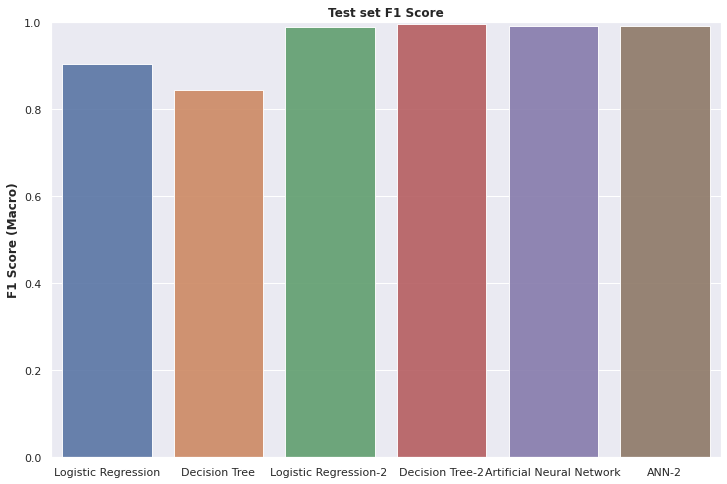

---------------FINAL F1 SCORES-----------------
{'Logistic Regression': 0.9042331714087439, 'Decision Tree': 0.8449159613779951, 'Logistic Regression-2 ': 0.9888164026095061, 'Decision Tree-2': 0.9961489088575097, 'Artificial Neural Network': 0.991614906832298, 'ANN-2': 0.9920979237682058}


In [148]:
model_names=['Logistic Regression','Decision Tree','Logistic Regression-2 ','Decision Tree-2', 'Artificial Neural Network', 'ANN-2']
model_scores=[acc_score_lr,acc_score_dt,acc_score_lr_,acc_score_dt_,acc_score_ann,acc_score_ann_1]
f1scores=[f1score_lr, f1score_dt, f1score_lr_, f1score_dt_,f1score_ann,f1score_ann_1]
comparison(model_names,model_scores,f1scores)

# Final Results:
# Based on Accuracy of the chosen model: Gives us a measure of true positives and true negatives.

## 1. By choosing the solver as lbfgs and setting the max iterations to 200, we can receive an accuracy of 90.77% on the testing data for the Logistic Regression with spaCy vectors as input features.
## 2. Decision tree classifier gives an accuracy of 85.51% with spaCy vectors as input features.
## 3. Logistic Regression with textual data as an input feature and Count Vectorizer and TFIDF Transformer in pipeline, gives an accuracy of 98.93%.
## 4. Decision Tree Classifier with textual data as an input feature and Count Vectorizer and TFIDF Transformer in pipeline, gives an accuracy of 99.63%.
## 5. Artificial Neural Network formed using keras and tensorflow backend with the Sequential Model and dense layers provide us an accuracy of 99.28% on the testing data with 1000 input features.
## 6. Artificial Neural Network formed using keras and tensorflow backend with the Sequential Model and dense layers provide us an accuracy of 99.21% on the testing data with 10000 input features.

# Based on the F1-scores of the chosen model: Gives us a measure of false positives and false negatives.

## 1. By choosing the solver as lbfgs and setting the max iterations to 200, we can receive a f1-score of 90.42% on the testing data for the Logistic Regression with spaCy vectors as input features.
## 2. Decision tree classifier gives a f1-score of 84.49% with spaCy vectors as input features.
## 3. Logistic Regression with textual data as an input feature and Count Vectorizer and TFIDF Transformer in pipeline, gives a f1 of 98.81%.
## 4. Decision Tree Classifier with textual data as an input feature and Count Vectorizer and TFIDF Transformer in pipeline, gives a f1-score of 99.61%.
## 5. Artificial Neural Network formed using keras and tensorflow backend with the Sequential Model and dense layers provide us a f1-score of 99.25% on the testing data with 1000 input features.
## 6. Artificial Neural Network formed using keras and tensorflow backend with the Sequential Model and dense layers provide us a f1-score of 99.17% on the testing data with 10000 input features.

# Also F1 score similar to that of accuracy shows how our model is accurate in predicting values by learning from the model training of whether it is a true news or a fake news. 

# Conclusions:

## Maximum accuracy and F1 score is achieved by using Decision Tree Classifier in a pipeline with the Count Vectorizer and TFIDF Transformer, but there is always a scope of improvement. Various things such as tuning the hyperparameters can be done to increase the accuracy and f1 score in future prospect depending on another dataset. 

# Future Work:

## 1. Collecting certain news based tweets.
## 2. Using the same Decision Tree Classifier with the said pipeline, we will predict the whether that is a fake news or not.
## 3. Apart from this another idea is to use the same for the credibility score assignment of a particular tweet which is a little bit different from this.

# Thankyou!
# A notebook by Anshul Gupta, Maninder Singh, and Kanishk Mamgain...